# **Capstone project: Providing data-driven suggestions for HR**

## Description and deliverables

This capstone project is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

Upon completion, you will have two artifacts that you would be able to present to future employers. One is a brief one-page summary of this project that you would present to external stakeholders as the data professional in Salifort Motors. The other is a complete code notebook provided here. Please consider your prior course work and select one way to achieve this given project question. Either use a regression model or machine learning model to predict whether or not an employee will leave the company. The exemplar following this actiivty shows both approaches, but you only need to do one.

In your deliverables, you will include the model evaluation (and interpretation if applicable), a data visualization(s) of your choice that is directly related to the question you ask, ethical considerations, and the resources you used to troubleshoot and find answers or solutions.


# **PACE stages**


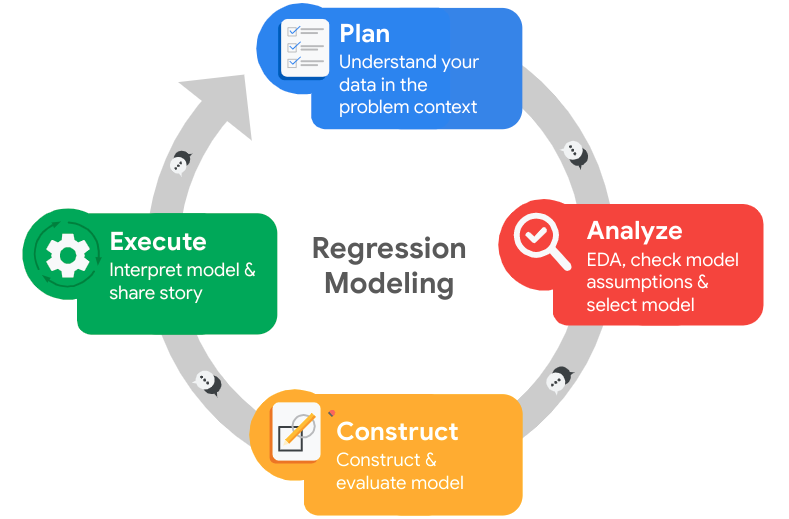

## **Pace: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following:

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

💭
### Reflect on these questions as you complete the plan stage.

*  Who are your stakeholders for this project?
- What are you trying to solve or accomplish?
- What are your initial observations when you explore the data?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




1. Senior Leadership Team at Salifort Motors.
2. Predict employee turnover based on various factors.
3. The dataset contains relevant variables for predicting employee turnover.
4. HR_capstone_dataset, Python, Machine Learning Libraries (scikit-learn, pandas, numpy).
5. Ensuring privacy and confidentiality of employee data during the entire process.

## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [82]:
# Data Manipulation
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

#Let's us see all columns on Jupyter: prevents redaction.
pd.set_option('display.max_columns', None)

# Data Modelling
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay, classification_report, \
accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc

# Plotting Feature Importance and Partial Dependence Plots
from sklearn.inspection import permutation_importance, PartialDependenceDisplay

# Storing Model
import pickle

### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [83]:
# RUN THIS CELL TO IMPORT YOUR DATA. 

# Load dataset into a dataframe
### YOUR CODE HERE ###
df0 = pd.read_csv("data/HR_capstone_dataset.csv")


# Display first few rows of the dataframe
### YOUR CODE HERE ###
df0.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [84]:
# Gather basic information about the data
### YOUR CODE HERE ###
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gather descriptive statistics about the data

In [85]:
# Gather descriptive statistics about the data
### YOUR CODE HERE ###
df0.describe(include='all')

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999,14999
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sales,low
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4140,7316
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,NaN,NaN
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,NaN,NaN
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,NaN,NaN


### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [86]:
# Display all column names
### YOUR CODE HERE ###
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [87]:
# Rename columns as needed
### YOUR CODE HERE ###
df0 = df0.rename(columns={
    'Work_accident' : 'work_accident', 
    'Department' : 'department',
    'average_montly_hours' : 'average_monthly_hours',
})

# Display all column names after the update
### YOUR CODE HERE ###
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'time_spend_company', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

### Check missing values

Check for any missing values in the data.

In [88]:
# Check for missing values
### YOUR CODE HERE ###
df0.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
time_spend_company       0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

### Check duplicates

Check for any duplicate entries in the data.

In [89]:
# Check for duplicates
### YOUR CODE HERE ###
df0.duplicated().sum()

3008

In [90]:
# Inspect some rows containing duplicates as needed
### YOUR CODE HERE ###
df0[df0.duplicated()].head(10)

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low
1516,0.40,0.50,2,127,3,0,1,0,IT,low
1616,0.37,0.46,2,156,3,0,1,0,sales,low
1696,0.39,0.56,2,160,3,0,1,0,sales,low
1833,0.10,0.85,6,266,4,0,1,0,sales,low
12000,0.38,0.53,2,157,3,0,1,0,sales,low


In [91]:
# Drop duplicates and save resulting dataframe in a new variable as needed
### YOUR CODE HERE ###
df = df0.drop_duplicates()

# Display first few rows of new dataframe as needed
### YOUR CODE HERE ###
df.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [92]:
df.shape

(11991, 10)

### Check outliers

Check for outliers in the data.

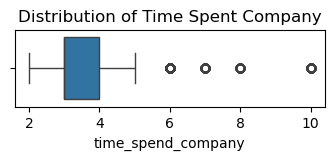

In [93]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
### YOUR CODE HERE ###
plt.figure(figsize=(4, 1))
sns.boxplot(x='time_spend_company', orient='h', data=df)
plt.title('Distribution of Time Spent Company')
plt.show()

In [94]:
# Determine the number of rows containing outliers
### YOUR CODE HERE ###
q3 = df['time_spend_company'].quantile(0.75)
q1 = df['time_spend_company'].quantile(0.25)

iqr = q3 -q1

upper_threshold = q3 + (1.5 * iqr)

outlier_df = df[df['time_spend_company'] >= upper_threshold]

row_number_outlier = outlier_df.shape[0]
row_number_outlier

824

Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



💭
### Reflect on these questions as you complete the analyze stage.

- What did you observe about the relationships between variables?
- What do you observe about the distributions in the data?
- What transformations did you make with your data? Why did you chose to make those decisions?
- What are some purposes of EDA before constructing a predictive model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [95]:
# Get numbers of people who left vs. stayed
### YOUR CODE HERE ###
print(df['left'].value_counts())

# Get percentages of people who left vs. stayed
### YOUR CODE HERE ###
print(df['left'].value_counts(normalize=True))

left
0    10000
1     1991
Name: count, dtype: int64
left
0    0.833959
1    0.166041
Name: proportion, dtype: float64


### Data visualizations

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

In [96]:
def box_plot(variable):
    """
    Creates a horizontal boxplot of a specified variable in a given DataFrame.

    Parameters:
    variable (str): The name of the variable to plot. This should be a column in the DataFrame.

    Returns:
    None
    """
    plt.figure(figsize=(4, 1))
    sns.boxplot(x=variable, orient='h', data=df)
    plt.title(f'Distribution of {variable}')
    plt.show()

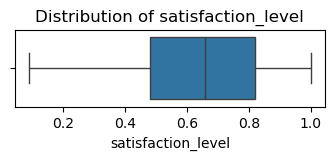

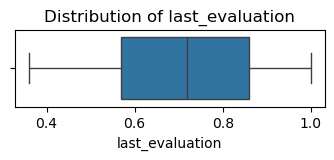

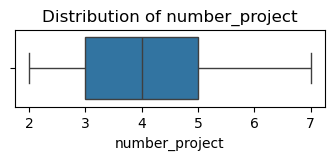

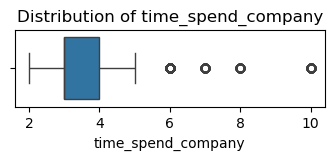

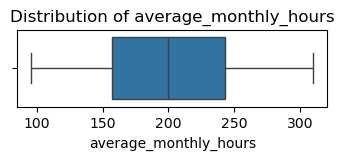

In [97]:
# Create a plot as needed
### YOUR CODE HERE ###
variables = ['satisfaction_level', 'last_evaluation', 'number_project', 'time_spend_company', 'average_monthly_hours']

for var in variables:
    box_plot(var)

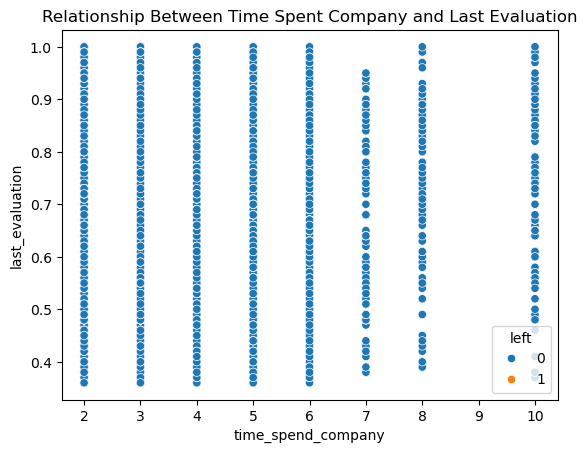

In [98]:
# Scatter plot of 'time_spend_company' and 'last_evaluation', differentiated by 'department'

sns.scatterplot(x='time_spend_company', y='last_evaluation', hue='left', data=df)
plt.title('Relationship Between Time Spent Company and Last Evaluation')
plt.show()

Equal distribution in the last evaluation by the tenure. 

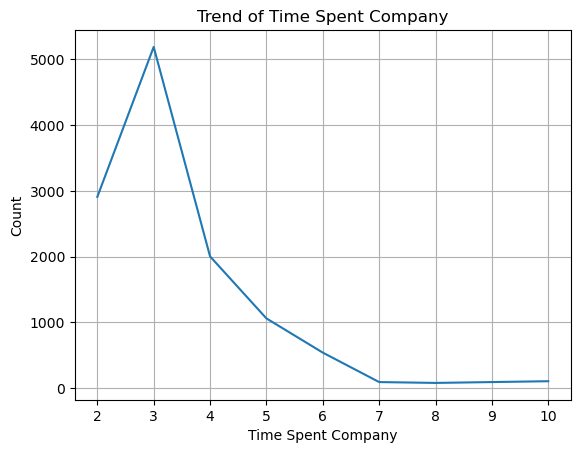

0.8427153698607289

In [99]:
# Line plot of 'time_spend_company'
df['time_spend_company'].value_counts().sort_index().plot(kind='line')
plt.xlabel('Time Spent Company')
plt.ylabel('Count')
plt.title('Trend of Time Spent Company')
plt.grid(True)
plt.show()

df[df['time_spend_company'] <= 4]['time_spend_company'].value_counts().sum() / len(df)

Currently, 84.27% of the employees have tenure less than 5 years. 

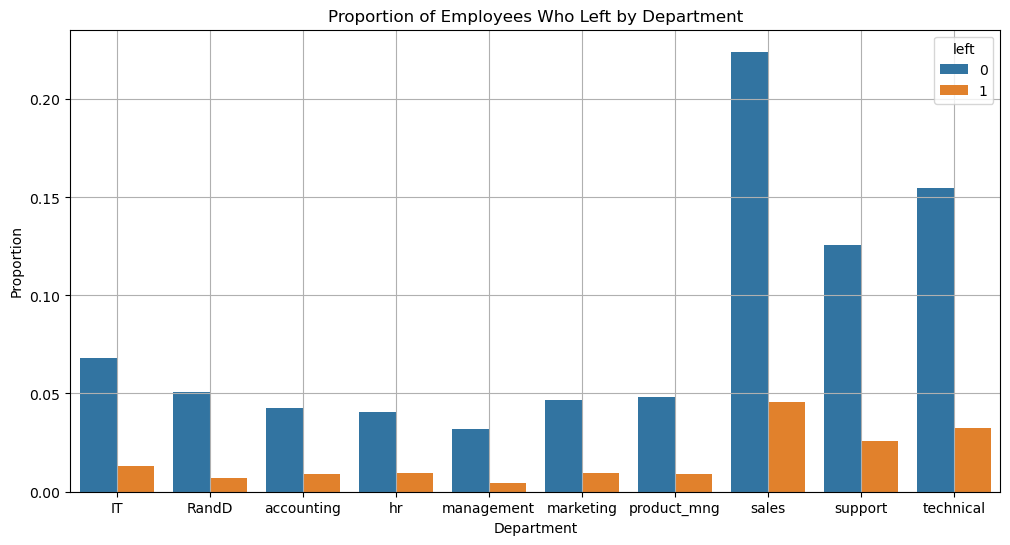

    department  proportion
0           IT    0.161885
1        RandD    0.122478
2   accounting    0.175523
3           hr    0.188020
4   management    0.119266
5    marketing    0.166419
6  product_mng    0.160350
7        sales    0.169805
8      support    0.171334
9    technical    0.173797


In [100]:
# Calculate the proportion of employees who left by department
proportion = df.groupby(['department', 'left'])['department'].size() / df['department'].count()

# Convert the proportions to a DataFrame
proportion_df = proportion.reset_index(name='proportion')


# Increase the figure size
plt.figure(figsize=(12, 6))

# Create a grouped bar plot
sns.barplot(x='department', y='proportion', hue='left', data=proportion_df, estimator=sum)

plt.xlabel('Department')
plt.ylabel('Proportion')
plt.title('Proportion of Employees Who Left by Department')
plt.grid(True)
plt.show()

# Calculate the count of employees who left by department
count_left = df.groupby('department')['left'].sum()

# Calculate the count of all employees by department
count_all = df['department'].value_counts()

# Calculate the proportion of employees who left in each department
proportion = count_left / count_all

# Convert the proportions to a DataFrame
proportion_df = proportion.reset_index()
proportion_df.columns = ['department', 'proportion']

# Print the proportions
print(proportion_df)


Although, there is a slight variation, there is probably little effect of department on whether or not employees leave or are retained. 

Most employees belong to the sales department and the least number of employees are part of the management.

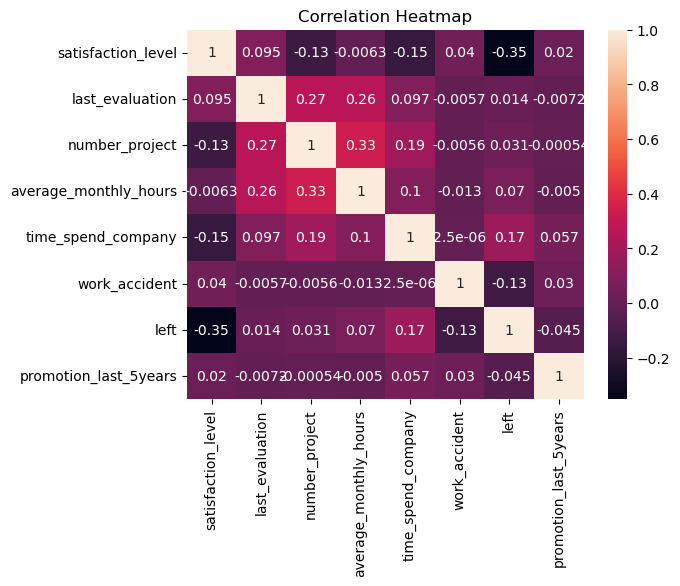

In [101]:
# Heatmap of correlations
corr = df.drop(['department', 'salary'], axis=1).corr()
sns.heatmap(corr, annot=True)
plt.title('Correlation Heatmap')
plt.show()

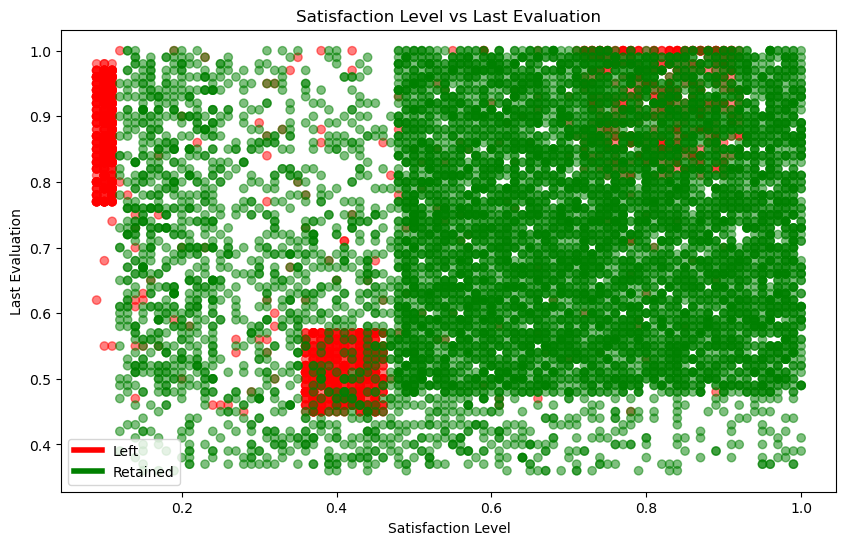

In [102]:
colors = ['red' if left == 1 else 'green' for left in df['left']]
labels = ['Left'] * len(df) + ['Retained'] * len(df)

plt.figure(figsize=(10, 6))
plt.scatter(df['satisfaction_level'], df['last_evaluation'], c=colors, alpha=0.5)
plt.xlabel('Satisfaction Level')
plt.ylabel('Last Evaluation')
plt.title('Satisfaction Level vs Last Evaluation')

# Add legend
plt.legend(handles=[plt.Line2D([0], [0], color='r', lw=4, label='Left'),
                     plt.Line2D([0], [0], color='g', lw=4, label='Retained')])

plt.show()

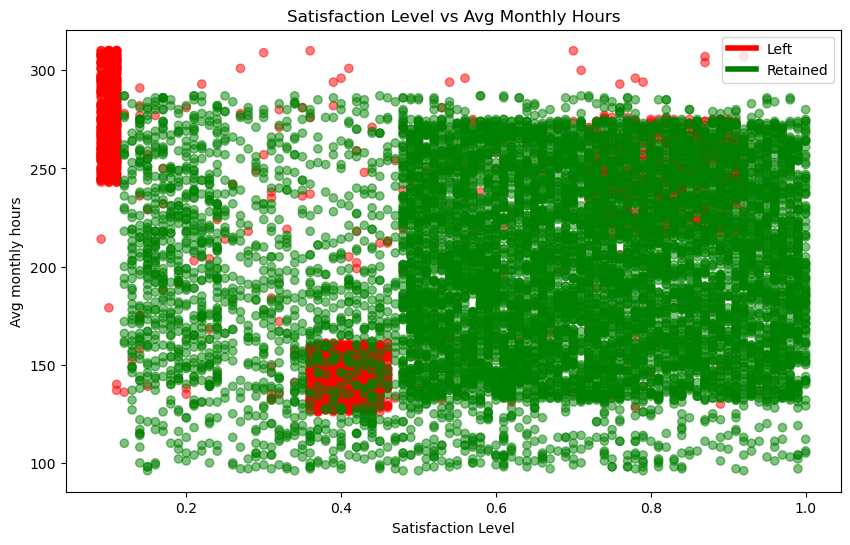

In [103]:
colors = ['red' if left == 1 else 'green' for left in df['left']]
labels = ['Left'] * len(df) + ['Retained'] * len(df)

plt.figure(figsize=(10, 6))
plt.scatter(df['satisfaction_level'], df['average_monthly_hours'], c=colors, alpha=0.5)
plt.xlabel('Satisfaction Level')
plt.ylabel('Avg monthly hours')
plt.title('Satisfaction Level vs Avg Monthly Hours')

# Add legend
plt.legend(handles=[plt.Line2D([0], [0], color='r', lw=4, label='Left'),
                     plt.Line2D([0], [0], color='g', lw=4, label='Retained')])

plt.show()


There is similarity in the above plot showing that number of hours worked per month may be correlated with last performance review score. 
Also, there are three groups of employees that left: 
group1: averaged long working hours with poor satisfaction levels, this group also had poor scores at the performance reviews.
group2: averaged short working hours with moderately poor satisfaction levels, and moderate scores at performance reviews.
group3: probably, the largest of them had high satisfaction level, averaged long working hours with good scores at performance reviews.

In [144]:
# Segment the data by tenure
df.loc[:, 'tenure'] = np.where((df['time_spend_company'] < 5), 0, 1)

turnover_rate = df.groupby('tenure')['left'].mean()

turnover_rate

tenure
0    0.138545
1    0.313362
Name: left, dtype: float64

The turnover rate in employees with tenure less than 5 years is 13.85% and those with tenure at least 5 years and above is 31.33%. This might be misleading because we know that majority of the dataset comprise employees with tenure less than 5 years. 

In [105]:
# Calculate the correlation
correlation = df['average_monthly_hours'].corr(df['last_evaluation'])

print("Correlation between average monthly hours and last evaluation:", correlation)

Correlation between average monthly hours and last evaluation: 0.26467755067263893


A correlation of 26.47% is weak.

In [106]:
group1 = df[(df['average_monthly_hours'] > 170) & (df['satisfaction_level'] < 0.5) & (df['last_evaluation'] > 0.5)]

group1_ = group1.drop(['department', 'salary'], axis=1)

print(len(group1_[group1_['left'] == 1]) / len(df[df['left'] == 1]))

mean_group1 = group1_.mean()

mean_group1

0.27624309392265195


satisfaction_level         0.232004
last_evaluation            0.789170
number_project             4.877193
average_monthly_hours    241.644399
time_spend_company         4.078273
work_accident              0.124157
left                       0.371120
promotion_last_5years      0.010121
tenure                     0.286775
dtype: float64

group1: Employees in this group work more than 170 hours per month, have a satisfaction level less than 0.5, and their last evaluation score is greater than 0.5. They tend to spend more time at the company (4.078273 years), work on the same number of projects as the overall population (4.877193), and have a higher chance of leaving (0.2762).

In [107]:
group1['salary'].mode()

0    low
Name: salary, dtype: object

In [108]:
group2 = df[(df['average_monthly_hours'] < 170) & (df['satisfaction_level'] < 0.5) & (df['last_evaluation'] < 0.5)]

group2_ = group2.drop(['department', 'salary'], axis=1)

print(len(group2_[group2_['left'] == 1]) / len(df[df['left'] == 1]))

mean_group2 = group2_.mean()

mean_group2

0.1567051732797589


satisfaction_level         0.388091
last_evaluation            0.456139
number_project             2.488069
average_monthly_hours    140.822126
time_spend_company         3.223427
work_accident              0.104121
left                       0.676790
promotion_last_5years      0.013015
tenure                     0.069414
dtype: float64

group2: Employees in this group work less than 170 hours per month, have a satisfaction level less than 0.5, and their last evaluation score is less than 0.5. They tend to spend less time at the company (3.223427 years), work on fewer projects (2.488069), and have a lesser chance of leaving (0.1567).

In [109]:
group2['salary'].mode()

0    low
Name: salary, dtype: object

In [110]:
group3 = df[(df['average_monthly_hours'] > 170) & (df['satisfaction_level'] > 0.5) & (df['last_evaluation'] > 0.5)]

group3_ = group3.drop(['department', 'salary'], axis=1)

print(len(group3_[group3_['left'] == 1]) / len(df[df['left'] == 1]))

mean_group3 = group3_.mean()

mean_group3

0.27122049221496736


satisfaction_level         0.756957
last_evaluation            0.764930
number_project             3.833391
average_monthly_hours    225.551934
time_spend_company         3.254793
work_accident              0.161206
left                       0.094109
promotion_last_5years      0.018125
tenure                     0.149878
dtype: float64

In [111]:
group3['salary'].mode()

0    low
Name: salary, dtype: object

group3: Employees in this group work more than 170 hours per month, have a satisfaction level greater than 0.5, and their last evaluation score is greater than 0.5. They tend to spend less time at the company (3.254793 years), work on fewer projects (3.833391), and have a similarly higher chance of leaving (0.2712).

### Insights

Following rigorous exploratory data analysis, we find that a staggering 84.27% of our employees have tenure less than 5 years. This tells us that a large portion of our workforce is relatively new, which could influence their level of commitment and loyalty to the company. Interestingly, we find little effect of the department on whether or not employees leave or are retained. Most employees belong to the sales department, and the least number of employees are part of the management.

Next, we delve into the specifics of three distinct groups of employees. Group 1 consists of employees who work more than 170 hours per month, have a satisfaction level less than 0.5, and their last evaluation score is greater than 0.5. Despite working more hours, these employees have a lower satisfaction level and a higher last evaluation score compared to the overall population. This suggests that while long working hours might be a concern, a high last evaluation score can offset this. However, despite having a higher last evaluation score, these employees have a higher chance of leaving the company. This could be due to other factors not captured in this group, such as personal circumstances, lack of career progression, or issues with management.

Our investigation leads us to another intriguing finding. In group 1, only 1.01% of employees were promoted in the last 5 years. This is significantly lower than the overall average of 1.69%. This could suggest that employees in group 1 face challenges in advancing their careers within the company. This could be due to a variety of factors, such as lack of opportunities for growth, perceived unfairness in promotions, or issues with management.
We then turn our attention to group 2. This group includes employees who work less than 170 hours per month, have a satisfaction level less than 0.5, and their last evaluation score is less than 0.5. Despite working fewer hours, these employees have a lesser chance of leaving. This seems counterintuitive! There might be other factors at play that are not included in the current analysis. For example, employees in group 2 might have unique circumstances that make them more likely to stay, despite their lower satisfaction levels and last evaluation scores. This could also mean that workload is a single most important factor!

Finally, we look at group 3. This group includes employees who work less than 170 hours per month, have a satisfaction level greater than 0.5, and their last evaluation score is greater than 0.5. These employees get more projects and have a slightly higher chance of leaving. This suggests that while these employees are satisfied with their jobs, they might prefer to have fewer responsibilities, which could contribute to their decision to leave.
Modal salary was consistent across all groups and was low.

In conclusion, while high satisfaction levels can contribute to lower turnover, other factors such as career progression opportunities and workload can also play a significant role. Companies should consider these factors when developing strategies to reduce turnover. 

# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


🔎
## Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size





💭
### Reflect on these questions as you complete the constructing stage.

- Do you notice anything odd?
- Which independent variables did you choose for the model and why?
- Are each of the assumptions met?
- How well does your model fit the data?
- Can you improve it? Is there anything you would change about the model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



[Double-click to enter your responses here.]

## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the type of prediction task.

Binary classification task.

### Identify the types of models most appropriate for this task.

Logistic regression and a Random Forest Model / gradient boosting machine

### Modeling

Add as many cells as you need to conduct the modeling process.

### Building a logistic regression model

In [112]:
# Building a logistic regression model;

#checking model assumptions;
## removing outliers

df_lgr = df.copy()

p90 = df_lgr['time_spend_company'].quantile(0.90)

# Replace outliers with the 90th percentile
df_lgr['time_spend_company'] = np.where(df_lgr['time_spend_company'] > upper_threshold, p90, df_lgr['time_spend_company'])

df_lgr['time_spend_company'].describe()

count    11991.000000
mean         3.239096
std          0.990931
min          2.000000
25%          3.000000
50%          3.000000
75%          4.000000
max          5.000000
Name: time_spend_company, dtype: float64

In [113]:
# linearity and multicolinearity check
df_lgr = df_lgr.drop(['tenure', 'work_accident', 'department', 'salary'], axis=1)

In [114]:
df_lgr.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,left,promotion_last_5years
0,0.38,0.53,2,157,3.0,1,0
1,0.80,0.86,5,262,5.0,1,0
2,0.11,0.88,7,272,4.0,1,0
3,0.72,0.87,5,223,5.0,1,0
4,0.37,0.52,2,159,3.0,1,0


In [115]:
def check_linearity(df, outcome_column='left', independent_variables=None):
    """
    Creates scatter plots to check for linearity in logistic regression model.
    
    Parameters:
    df : pandas.DataFrame
        The DataFrame containing the data.
    outcome_column : str, optional
        The name of the outcome column in the DataFrame. Default is 'left'.
    independent_variables : list, optional
        A list of strings representing the names of the independent variables.
        If not provided, all columns except the outcome column will be used.
        
    Returns:
    None
    """
    # Calculate logit of the outcome
    epsilon = 1e-7 # Small constant to prevent division by zero
    df_lgr['logit'] = np.log(df_lgr['left'] / ((1 - df_lgr['left']) + epsilon))


    # Use all columns except the outcome column as independent variables if not specified
    if independent_variables is None:
        independent_variables = [col for col in df.columns if col != outcome_column]

    # Create scatter plots for each independent variable
    for var in independent_variables:
        plt.figure(figsize=(6,4))
        plt.scatter(df[var], df['logit'])
        plt.xlabel(var)
        plt.ylabel('Logit of Outcome')
        plt.title(f'Scatter plot of Logit of {outcome_column} vs {var}')
        plt.show()

/home/iykeeue/anaconda3/envs/jupyter-ai/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


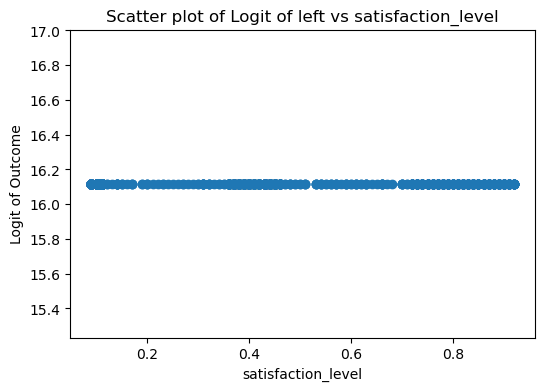

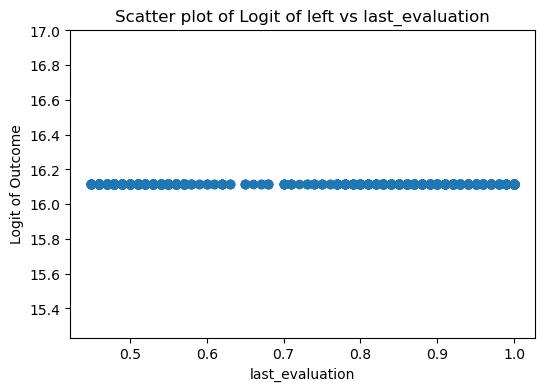

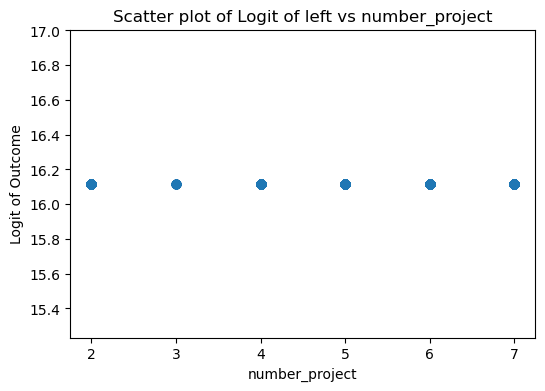

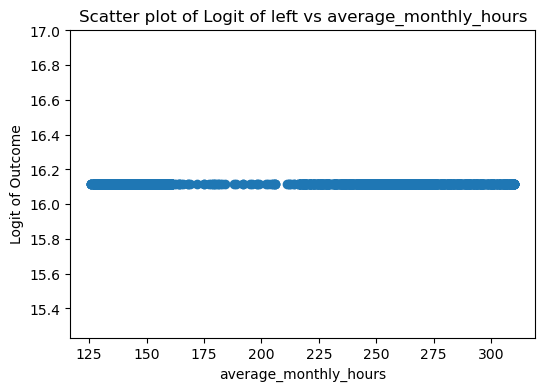

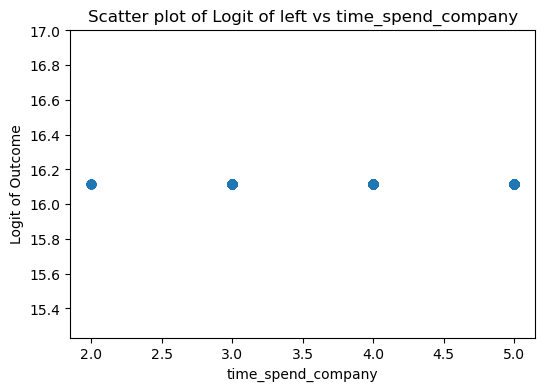

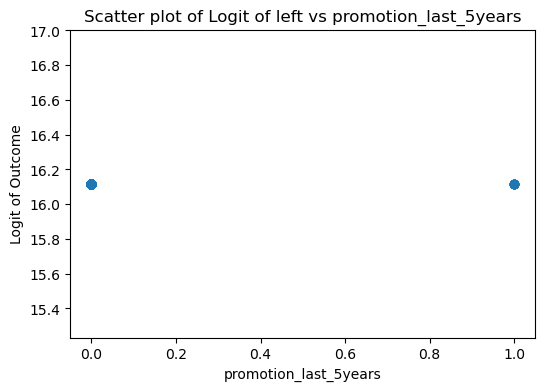

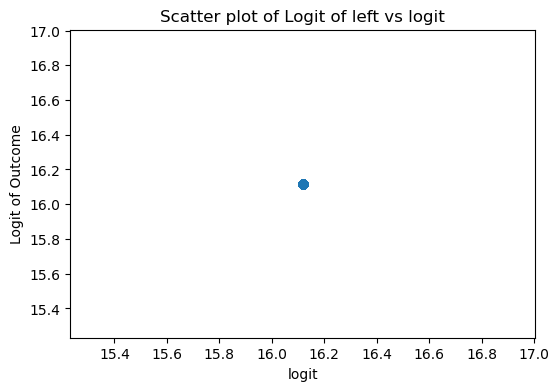

In [116]:
check_linearity(df_lgr)

The lines show linearity but are mostly horizontal.

In [117]:
df_lgr.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,left,promotion_last_5years,logit
0,0.38,0.53,2,157,3.0,1,0,16.118096
1,0.80,0.86,5,262,5.0,1,0,16.118096
2,0.11,0.88,7,272,4.0,1,0,16.118096
3,0.72,0.87,5,223,5.0,1,0,16.118096
4,0.37,0.52,2,159,3.0,1,0,16.118096


In [118]:
# selecting our independent variables/features;
X = df_lgr.drop(['left', 'logit'], axis=1)

In [119]:
# spliting our dataset into train and test dataset;
# considering the size of our dataset, we are using the test holdout sample to validate our data.
y = df_lgr['left']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

In [120]:
clf = LogisticRegression(random_state=0, max_iter=800).fit(X_train, y_train)

In [121]:
clf.coef_

array([[-3.60815238,  0.42254756, -0.34164943,  0.00380095,  0.6869281 ,
        -1.25501875]])

In [122]:
clf.intercept_

array([-1.7397289])

In [123]:
clf.classes_

array([0, 1])

In [124]:
# interpreting the results 

# Coefficients
coeff = np.array([0.06622237, -1.15497155])

# Exponentiate the coefficients
exp_coeff = np.exp(coeff)

# Print the results
for i, coef in enumerate(exp_coeff):
    print(f"Feature {i+1}: {coef:.3f}")

Feature 1: 1.068
Feature 2: 0.315


This implies that for each project added to the number of projects an employee has, there is a 6.8% increased odds of leaving the company and for every promotion within a five year period, there is a decreased chance (68.5%) of the employee leaving the company.

In [125]:
# Model evaluation
y_pred = clf.predict(X_test)

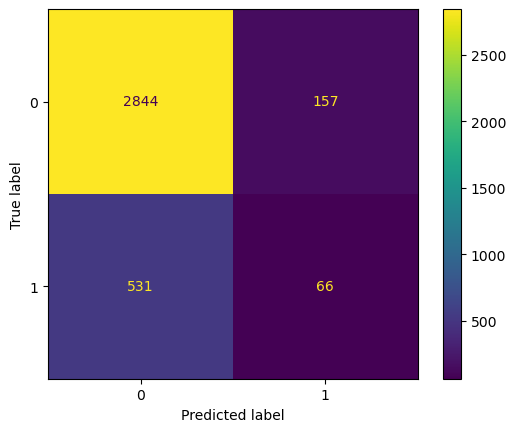

In [126]:
cm = confusion_matrix(y_test, y_pred, labels = clf.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels= clf.classes_)

disp.plot()

In [127]:
# evaluation metrics
print(accuracy_score(y_test, y_pred))
print(precision_score(y_test, y_pred))
print(recall_score(y_test, y_pred))
print(f1_score(y_test, y_pred))

0.8087826570316843
0.29596412556053814
0.11055276381909548
0.16097560975609757


In [128]:
# plotting an RocCurve.

def plot_roc_curve(y_test, y_pred, estimator_name='Logistic Regression'):
    """
    Plot the Receiver Operating Characteristic (ROC) curve.

    Parameters:
    y_test : array-like of shape (n_samples,)
        True binary labels.
    y_pred : array-like of shape (n_samples,)
        Target scores, can either be probability estimates of the positive class, confidence values, or non-thresholded measure of decisions.
    estimator_name : str, optional
        Name of the estimator to be displayed in the legend.
    """
    # Compute the false positive rate (FPR), true positive rate (TPR), and thresholds
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    
    # Compute the area under the ROC curve (AUC)
    roc_auc = auc(fpr, tpr)
    
    # Create the ROC curve display object
    roc_disp = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name=estimator_name)
    
    # Plot the ROC curve
    roc_disp.plot()

# Example usage:
# plot_roc_curve(y_test, y_pred, estimator_name='Random Forest')

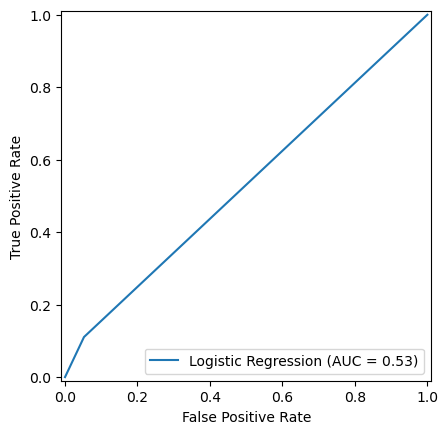

In [129]:
plot_roc_curve(y_test, y_pred, estimator_name='Logistic Regression')

### Building a Random Forest model

In [130]:
# creating a copy of our dataset.
df_rf = df.copy()

df_rf.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary,tenure
0,0.38,0.53,2,157,3,0,1,0,sales,low,0
1,0.80,0.86,5,262,6,0,1,0,sales,medium,1
2,0.11,0.88,7,272,4,0,1,0,sales,medium,0
3,0.72,0.87,5,223,5,0,1,0,sales,low,1
4,0.37,0.52,2,159,3,0,1,0,sales,low,0


A beautiful thing about random forest models is that it takes no prior model assumptions!

In [131]:
# conversion of categorical variables to numerical ones.
df_rf = pd.get_dummies(df_rf, columns=['department', 'salary'], drop_first=False)

df_rf.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_5years,tenure,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False,False,True,False
1,0.80,0.86,5,262,6,0,1,0,1,False,False,False,False,False,False,False,True,False,False,False,False,True
2,0.11,0.88,7,272,4,0,1,0,0,False,False,False,False,False,False,False,True,False,False,False,False,True
3,0.72,0.87,5,223,5,0,1,0,1,False,False,False,False,False,False,False,True,False,False,False,True,False
4,0.37,0.52,2,159,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False,False,True,False


In [132]:
# splitting our dataset;
X = df_rf.drop('left', axis=1)

y = df_rf['left']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify=y, random_state=42)

In [133]:
rf = RandomForestClassifier(random_state=0)

cv_params = {
    'max_features': [4, 6, 8, 10],
    'n_estimators' : [400, 450, 500],
    'max_samples' : [0.8, 0.9], 
    'max_depth' : [None],
    'min_samples_split' : [2],
    'min_samples_leaf' : [1]
}

scoring = ['precision', 'accuracy', 'recall', 'f1']

rf_cv = GridSearchCV(rf, cv_params, scoring=scoring, cv=4, refit='recall', n_jobs=-1, verbose=1)

In [134]:
%%time

# training the model

rf_cv.fit(X_train, y_train)

Fitting 4 folds for each of 24 candidates, totalling 96 fits
CPU times: user 6.42 s, sys: 166 ms, total: 6.58 s
Wall time: 3min 36s


GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'max_depth': [None], 'max_features': [4, 6, 8, 10],
                         'max_samples': [0.8, 0.9], 'min_samples_leaf': [1],
                         'min_samples_split': [2],
                         'n_estimators': [400, 450, 500]},
             refit='recall', scoring=['precision', 'accuracy', 'recall', 'f1'],
             verbose=1)

In [135]:
rf_cv.best_params_

{'max_depth': None,
 'max_features': 10,
 'max_samples': 0.9,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 450}

In [136]:
rf_cv.best_estimator_

RandomForestClassifier(max_features=10, max_samples=0.9, n_estimators=450,
                       random_state=0)

In [137]:
y_pred = rf_cv.best_estimator_.predict(X_test)

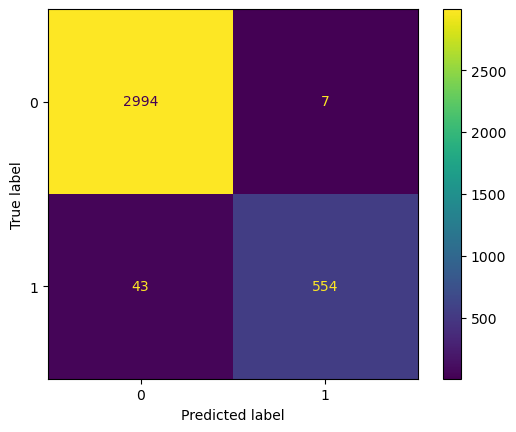

In [138]:
cm = confusion_matrix(y_test, y_pred, labels=rf_cv.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_cv.classes_)

disp.plot()

# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



✏
## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






💭
### Reflect on these questions as you complete the executing stage.

- What key insights emerged from your model(s)?
- What business recommendations do you propose based on the models built?
- What potential recommendations would you make to your manager/company?
- Do you think your model could be improved? Why or why not? How?
- Given what you know about the data and the models you were using, what other questions could you address for the team?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



Double-click to enter your responses here.

## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




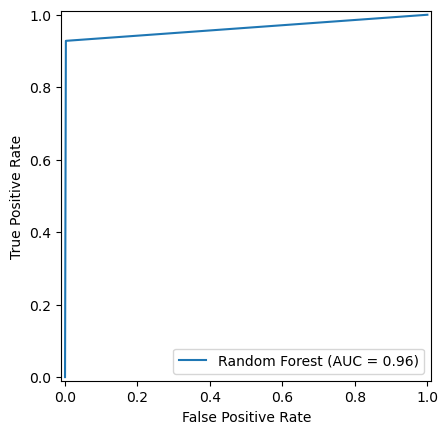

In [139]:
plot_roc_curve(y_test, y_pred, estimator_name='Random Forest')

Random forest has shown a very high capacity of predicting the outcome variable. 

In [140]:
# Calculate the metrics
accuracy = accuracy_score(y_test, y_pred) * 100
precision = precision_score(y_test, y_pred) * 100
recall = recall_score(y_test, y_pred) * 100
f1 = f1_score(y_test, y_pred) * 100

# Print the metrics with percentage signs
print(f'Accuracy: {accuracy:.2f}%')
print(f'Precision: {precision:.2f}%')
print(f'Recall: {recall:.2f}%')
print(f'F1 Score: {f1:.2f}%')

Accuracy: 98.61%
Precision: 98.75%
Recall: 92.80%
F1 Score: 95.68%


Area under curve is 96% for random forest a much better improvement than the logistic regression model.

/tmp/ipykernel_5138/3722614317.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='feature', data=feature_importances, palette='viridis')


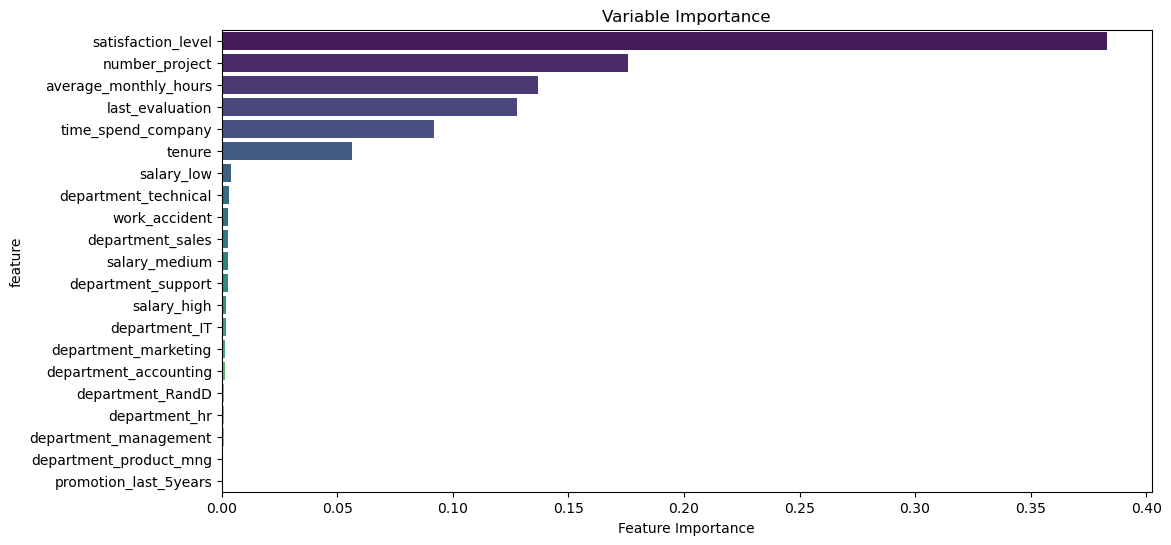

In [141]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming rf_cv is your GridSearchCV object and X is your DataFrame with columns
best_model = rf_cv.best_estimator_
importances = best_model.feature_importances_

# Define sorted_idx before creating the DataFrame
sorted_idx = importances.argsort()

# Create a DataFrame with feature importances and their corresponding feature names
feature_importances = pd.DataFrame({
    'feature': X.columns[sorted_idx][::-1], # Reverse the order to plot from largest to smallest
    'importance': importances[sorted_idx][::-1] # Reverse the order to plot from largest to smallest
})

# Set the figure size
plt.figure(figsize=(12, 6))

# Create the bar plot with Seaborn
sns.barplot(x='importance', y='feature', data=feature_importances, palette='viridis')

# Add labels and title
plt.xlabel('Feature Importance')
plt.title('Variable Importance')

# Show the plot
plt.show()

Satisfaction level, number of projects, average monthly hours spent at work, last score at last performance review, amount of years spent in company were significant features affecting employee turnover rate with respect to other factors. Unsurprisingly, promotion in the last 5 years contributed the least to employee turnover. 

In [142]:
# model cross-validation score

# Perform k-fold cross-validation
cv_scores = cross_val_score(rf, X, y, cv=5, scoring='recall')

# Convert the scores to percentages
cv_scores_percent = cv_scores * 100

# Print the mean cross-validation score as a percentage
print("Mean Cross-Validation Score: {:.2f}%".format(cv_scores_percent.mean()))

Mean Cross-Validation Score: 91.46%


### Summary of model results

Area under curve is 96% for random forest a much better improvement than the logistic regression model.

Satisfaction level, number of projects, average monthly hours spent at work, last score at last performance review, amount of years spent in company were significant features affecting employee turnover rate with respect to other factors. Surprisingly, promotion in the last 5 years contributed the least to employee turnover.

Mean Cross-Validation Score: 91.46%

### Conclusion, Recommendations, Next Steps

1. **Improve Employee Satisfaction**: Since satisfaction level is a significant factor affecting employee turnover, invest in employee satisfaction programs. This could include improving working conditions, providing opportunities for professional growth, or enhancing communication channels.

2. **Encourage Project Participation**: Encouraging employees to participate in projects can increase their engagement and reduce the likelihood of them leaving the company. Consider creating more collaborative environments or offering incentives for active participation in projects.

3. **Optimize Work Hours**: If employees are spending excessive time at work, it could be indicative of burnout or dissatisfaction. Review workload management practices and consider implementing flexible work arrangements or work-life balance initiatives.

4. **Regular Performance Reviews**: Last score at the last performance review is a significant factor. Regular performance reviews can help identify areas for improvement early and provide timely feedback to employees, which can boost morale and job satisfaction.

5. **Promotion Opportunities**: While promotions contribute the least to employee retention, they are still important. Offering clear career paths and opportunities for advancement can motivate employees to stay with the company longer.

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.